<img src="https://i.postimg.cc/ydZcb9cY/Hello.jpg">

<img src="https://i.postimg.cc/BQkMs2zd/inkpx-word-art.png">

<img src="https://i.postimg.cc/13wPRjV1/443997.png">

<div style="border-radius:10px; padding: 15px; background-color: #e3e6fa; text-align:left; font-size:120%; background-image: url(https://i.postimg.cc/0jG2Q5Nm/Adobe-Stock-522250922-Preview-Medium.jpg)">

<h4 align="left"><span style="font-weight:700; font-size:160%"><font color=#005f26>Description:</font></span></h4>

<span style="font-weight:100; color:navy; font-weight:500">According to the World Health Organization (WHO)</br>
stroke is the 2nd leading cause of death globally, responsible</br>
for approximately 11% of total deaths.</br>
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient</apan>.


<a id="1"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/W1kpF4KK/UEAb-NOh-red-wine-wallpaper.jpg);font-family:tahoma;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c"> Table Of Content</p></b></h1>

<a id="content"></a>    
<div style="border-radius:20px; padding: 15px; font-size:100%; text-align:left; background-image: url(https://i.postimg.cc/0jG2Q5Nm/Adobe-Stock-522250922-Preview-Medium.jpg)">

<h2><span style="text-align:center; font-weight:bolder; color:navy; font-size:130%">Table of Contents:</span></h2>

 * **[Step 1 | Python Libraries](#setup)**
    -  [1.1 | Import Libraries](#import)
    -  [1.2 | Library configurations](#config)
 *  **[Step 2 | Data](#data)**
    -  [2.1 | Collecting Data](#load_data)
    -  [2.2 | Data Information](#info)
    -  [2.3 | Attribute Information](#columns)
 *  **[Step 3 | Data Preprocessning](#preprocessing)**
    -  [3.1 | Missing Values Handling](#missing)
    -  [3.2 | Visualization and Plots](#plot)
    -  [3.3 | Plots Analysis](#plot_analysis)
    -  [3.4 | Target Categorizing](#Target_Categorizing)
    -  [3.5 | Normalization](#norm)
 *  **[Step 4 | Modeling](#ml)**
    -  [4.1 | Initialization](#init)
    -  [4.2 | RandomForestClassifier](#rf)
    -  [4.3 | LogisticRegression](#lr)
    -  [4.4 | SVC](#svc)
    -  [4.5 | DecisionTreeClassifier](#tree)
    -  [4.6 | KNeighborsClassifier](#knn)
    -  [4.7 | result](#result)
    -  [4.8 | Final Modeling](#final_ml)
 *  **[Author](#author)**

<a id="setup"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/W1kpF4KK/UEAb-NOh-red-wine-wallpaper.jpg);font-family:tahoma;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step1 | Python Libraries</p></b></h1>

[🏠 Tabel of Contents](#content)

<a id="import"></a>
<h2><b><span style="color:#009b2d">🍷 Step 1.1 | </span><span style="color:#9b006e">Import Libraries</span></b></h2>

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from termcolor import colored

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

<a id="config"></a>
<h2><b><span style="color:#009b2d">🍷 Step 1.2 | </span><span style="color:#9b006e">Library configurations</span></b></h2>

In [2]:
pd.options.mode.copy_on_write = True # Allow re-write on variable
sns.set_style('darkgrid') # Seaborn style
warnings.filterwarnings('ignore') # Ignore warnings
pd.set_option('display.max_columns', None) # Setting this option will print all collumns of a dataframe
pd.set_option('display.max_colwidth', None) # Setting this option will print all of the data in a feature

In [3]:
sns.color_palette("Spectral", as_cmap=True)
sns.set_palette("Spectral")

<a id="data"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/W1kpF4KK/UEAb-NOh-red-wine-wallpaper.jpg);font-family:tahoma;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step2 | Data</p></b></h1>

[🏠 Tabel of Contents](#content)

<a id="load_data"></a>
<h2><b><span style="color:#009b2d">🍷 Step 2.1 | </span><span style="color:#9b006e">Collecting Data</span></b></h2>

In [4]:
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<a id="info"></a>
<h2><b><span style="color:#009b2d">🍷 Step 2.2 | </span><span style="color:#9b006e">Data Information</span></b></h2>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [89]:
data.describe().T.style.background_gradient(axis=0)

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.000000,8.319637,1.741096,4.600000,7.100000,7.900000,9.200000,15.900000
volatile acidity,1599.000000,0.527821,0.179060,0.120000,0.390000,0.520000,0.640000,1.580000
citric acid,1599.000000,0.270976,0.194801,0.000000,0.090000,0.260000,0.420000,1.000000
residual sugar,1599.000000,2.538806,1.409928,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1599.000000,0.087467,0.047065,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1599.000000,15.874922,10.460157,1.000000,7.000000,14.000000,21.000000,72.000000
total sulfur dioxide,1599.000000,46.467792,32.895324,6.000000,22.000000,38.000000,62.000000,289.000000
density,1599.000000,0.996747,0.001887,0.990070,0.995600,0.996750,0.997835,1.003690
pH,1599.000000,3.311113,0.154386,2.740000,3.210000,3.310000,3.400000,4.010000
sulphates,1599.000000,0.658149,0.169507,0.330000,0.550000,0.620000,0.730000,2.000000


In [79]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

<a id="columns"></a>
<h2><b><span style="color:#009b2d">🍷 Step 2.3 | </span><span style="color:#9b006e">Attribute Information</span></b></h2>

<div style="border-radius:10px;
            border : black solid;
            background-color: #E8D9F3;
            font-size:100%;
            text-align: left">

<h2 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center> Explanation of the variables 📜 📖 📚
</center></h2>  
    
* ****fixed acidity:**** most acids involved with wine or fixed or nonvolatile (do not evaporate readily). Acidity is a characteristic determined by the total sum of acids that a sample contains. We can quantify the set of all of them in an undifferentiated way (total acidity) or in a grouped way (fixed acidity and volatile acidity). Fixed acidity corresponds to the set of low volatility organic acids such as malic, lactic, tartaric or citric acids and is inherent to the characteristics of the sample.    
* ****volatile acidity:**** the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste. Volatile acidity corresponds to the set of short chain organic acids that can be extracted from the sample by means of a distillation process: formic acid, acetic acid, propionic acid and butyric acid.    
* ****citric acid:**** found in small quantities, citric acid can add 'freshness' and flavor to wines. Citric acid is a colorless weak organic acid. It occurs naturally in citrus fruits. In biochemistry, it is an intermediate in the citric acid cycle, which occurs in the metabolism of all aerobic organisms.    
* ****residual sugar:**** the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter. Residual sugar refers to the sugars left unfermented in a finished wine. It is measured by grams of sugar per litre (g/l). The amount of residual sugar affects a wine's sweetness and, in the EU, the RS level is linked to specific labelling terms.    
* ****chlorides:**** the amount of salt in the wine. The higher extraction of chloride during red winemaking is due to the ions extracted from skins during fermentation. Therefore, red juice should have no more than 356mg/L chloride ions so that finished wine does not exceed the maximum legal level of 606mg/L chloride(356mg/L in red juice x 1.7 = 606).    
* ****free sulfur dioxide:**** the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion. What is free sulphur dioxide in wine? The free sulfites are those available to react and thus exhibit both germicidal and antioxidant properties. The bound sulfites are those that have reacted (both reversibly and irreversibly) with other molecules within the wine medium. The sum of the free and bound sulfites defines the total sulfite concentration.    
* ****total sulfur dioxide:**** amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2. Simply put, Total Sulfur Dioxide (TSO2) is the portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine such as aldehydes, pigments, or sugars.    
* ****density:**** the density of water is close to that of water depending on the percent alcohol and sugar content. How do you measure the density of wine? A hydrometer is an instrument used to measure liquid density. It is a sealed glass tube with a weighted bulb at one end, winemakers use this instrument to measure density of juice, fermenting wine and completed wine in relation to pure water. This ratio is called specific gravity (SG).    
* ****pH:**** describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4. What is a high pH in wine? Wines which have higher pH values (>3.65) have a series of potential challenges during vinification and aging. First, high pH wines have an increased chance of microbial spoilage. Traditionally, sulfur dioxide (often in the form of potassium metabisulfite) is used to keep wines stable during aging.    
* ****sulphates:**** a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial. Wine sulfites are naturally occurring at low levels in all wines, and are one of the thousands of chemical by-products created during the fermentation process. However, sulfites are also added by the winemaker to preserve and protect the wine from bacteria and yeast-laden invasions. For some, sulfur allergies may be associated with headaches and stuffy sinuses after a glass or two of wine. It is a a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial.    
* ****Alcohol:**** this is the percent alcohol content of the wine    
* ****quality:**** output variable (based on sensory data, score between 3 and 8).

<a id="preprocessing"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/W1kpF4KK/UEAb-NOh-red-wine-wallpaper.jpg);font-family:tahoma;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step 3 | Data Preprocessning</p></b></h1>

[🏠 Tabel of Contents](#content)

<a id="missing"></a>
<h2><b><span style="color:#009b2d">🍷 Step 3.1 | </span><span style="color:#9b006e">Missing Values Handling</span></b></h2>

In [7]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is no missing values

<a id="plot"></a>
<h2><b><span style="color:#009b2d">🍷 Step 3.2 | </span><span style="color:#9b006e">Visualization and Plots</span></b></h2>

In [8]:
columns = list(data.columns)

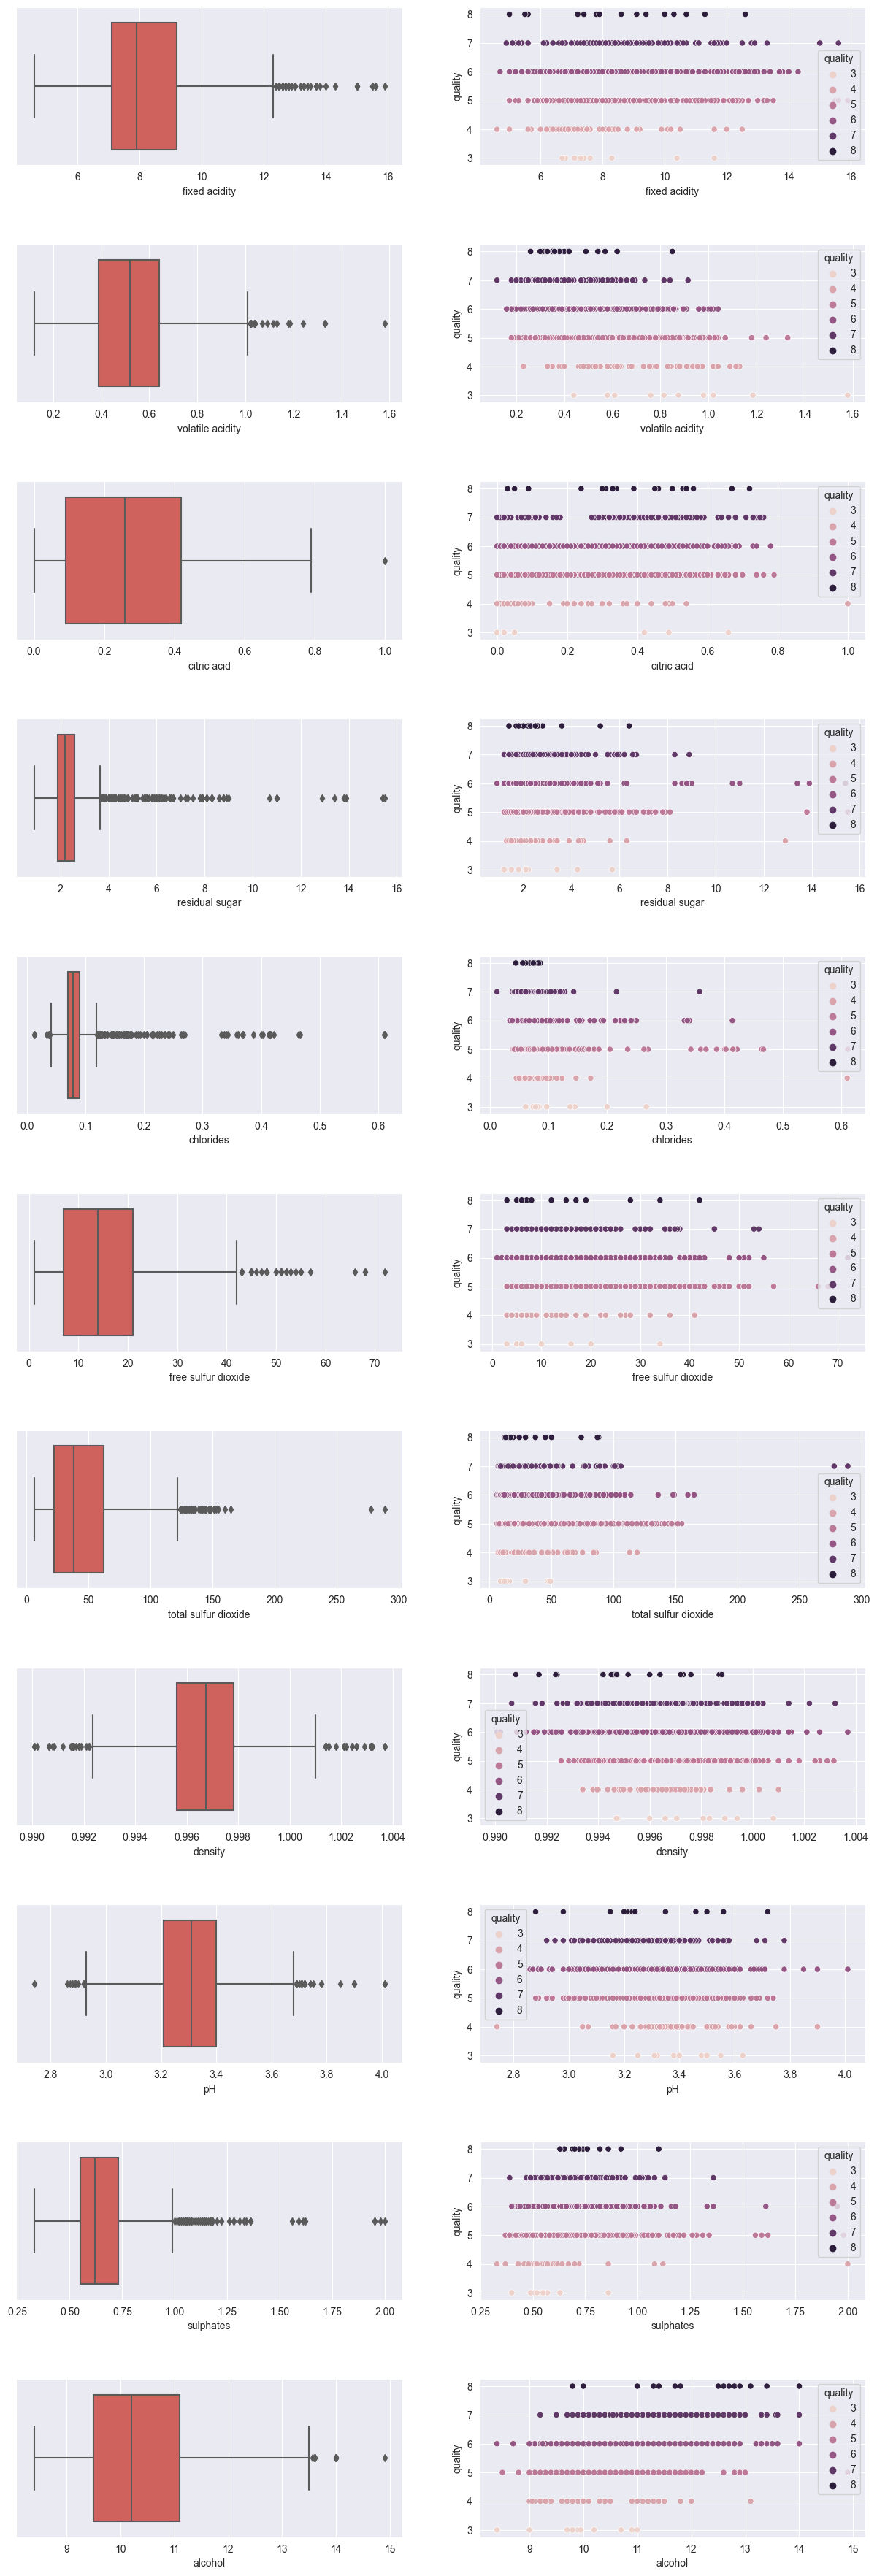

In [9]:
fig, ax = plt.subplots(11, 2, figsize=(15, 45))
plt.subplots_adjust(hspace = 0.5)
for i in range(11) :
    # AX 1
    sns.boxplot(x=columns[i], data=data, ax=ax[i, 0])
    # Ax 2
    sns.scatterplot(x=columns[i], y='quality', data=data, hue='quality', ax=ax[i, 1])

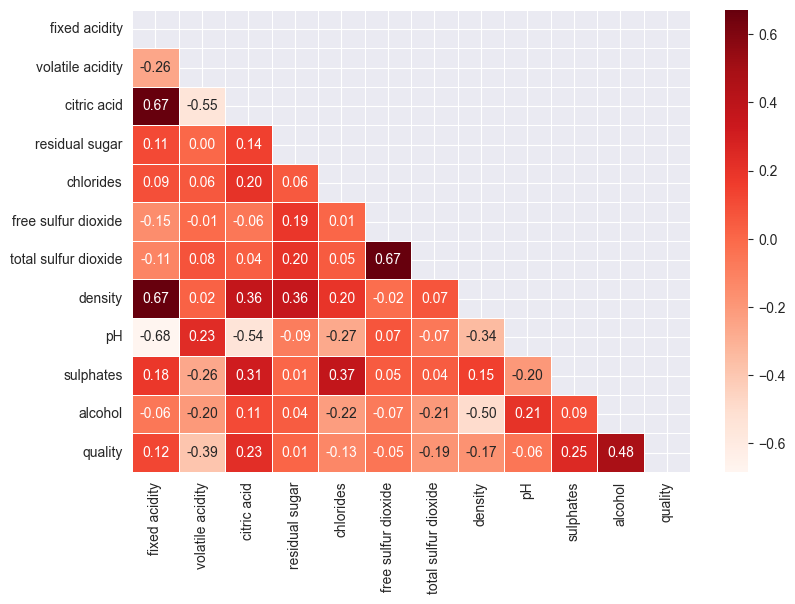

In [10]:
corr = data.corr()
# cmap = sns.diverging_palette(-1, 1, s=100, l=50, n=15, center="dark", as_cmap=True)
plt.figure(figsize=(9, 6))
sns.heatmap(corr, annot=True, fmt='.2f', linewidth=0.5, cmap='Reds', mask=np.triu(corr))
plt.show()

<a id="plot_analysis"></a>
<h2><b><span style="color:#009b2d">🍷 Step 3.3 | </span><span style="color:#9b006e">Plots Analysis</span></b></h2>

In [11]:
# Pass

<a id="Target_Categorizing"></a>
<h2><b><span style="color:#009b2d">🍷 Step 3.4 | </span><span style="color:#9b006e">Target Categorizing</span></b></h2>

In [12]:
data = data.sort_values(by='quality')

In [13]:
# types of quality of wine :
data.quality.unique()

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [14]:
data = data.replace(
    {'quality' : {
        8 : 'Good',
        7 : 'Good',
        6 : 'Middle',
        5 : 'Middle',
        4 : 'Bad',
        3 : 'Bad',
        
    }}
)

In [15]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1478,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,Bad
832,10.4,0.440,0.42,1.5,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,Bad
899,8.3,1.020,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,Bad
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,Bad
459,11.6,0.580,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...
495,10.7,0.350,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,Good
1403,7.2,0.330,0.33,1.7,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,Good
1090,10.0,0.260,0.54,1.9,0.083,42.0,74.0,0.99451,2.98,0.63,11.8,Good
1449,7.2,0.380,0.31,2.0,0.056,15.0,29.0,0.99472,3.23,0.76,11.3,Good


<a id="norm"></a>
<h2><b><span style="color:#009b2d">🍷 Step 3.5 | </span><span style="color:#9b006e">Normalization</span></b></h2>

In [16]:
X_temp = data.drop(columns='quality')
y = data.quality

In [17]:
scaler = MinMaxScaler().fit_transform(X_temp)
X = pd.DataFrame(scaler, columns=X_temp.columns)
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<a id="modeling"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/W1kpF4KK/UEAb-NOh-red-wine-wallpaper.jpg);font-family:tahoma;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step 4 | Modeling</p></b></h1>

[🏠 Tabel of Contents](#content)

<a id="norm"></a>
<h2><b><span style="color:#009b2d">🍷 Step 4.1 | </span><span style="color:#9b006e">Initialization</span></b></h2>

In [18]:
# define a function to ploting Confusion matrix
def plot_confusion_matrix(y_test, y_prediction):
    cm = metrics.confusion_matrix(y_test, y_prediction)
    ax = plt.subplot()
    ax = sns.heatmap(cm, annot=True, fmt='', cmap="Reds")
    ax.set_xlabel('Prediced labels', fontsize=18)
    ax.set_ylabel('True labels', fontsize=18)
    ax.set_title('Confusion Matrix', fontsize=25)
    ax.xaxis.set_ticklabels(['Bad', 'Good', 'Middle'])
    ax.yaxis.set_ticklabels(['Bad', 'Good', 'Middle']) 
    plt.show()

In [19]:
data.quality.value_counts()

quality
Middle    1319
Good       217
Bad         63
Name: count, dtype: int64

In [20]:
# Splite
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0)

<a id="rf"></a>
<h2><b><span style="color:#009b2d">🍷 Step 4.2 | </span><span style="color:#9b006e">RandomForestClassifier</span></b></h2>

In [21]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'n_estimators' : [50, 150, 500],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_features' : ['sqrt', 'log2']
}

rf = RandomForestClassifier(n_jobs=-1)
rf_cv = GridSearchCV(estimator=rf, cv=20, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters : ', rf_cv.best_params_)
print('accuracy : ', rf_cv.best_score_)

Tuned hyper parameters :  {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 50}
accuracy :  0.8864253393665159


In [22]:
# Model :
rf = RandomForestClassifier(**rf_cv.best_params_).fit(X_train, y_train)

In [23]:
y_pred_rf = rf.predict(X_test)

rf_score = round(rf.score(X_test, y_test), 3)
print('RandomForestClassifier score : ', rf_score)

RandomForestClassifier score :  0.852


In [24]:
y_test.value_counts()

quality
Middle    449
Good       83
Bad        28
Name: count, dtype: int64

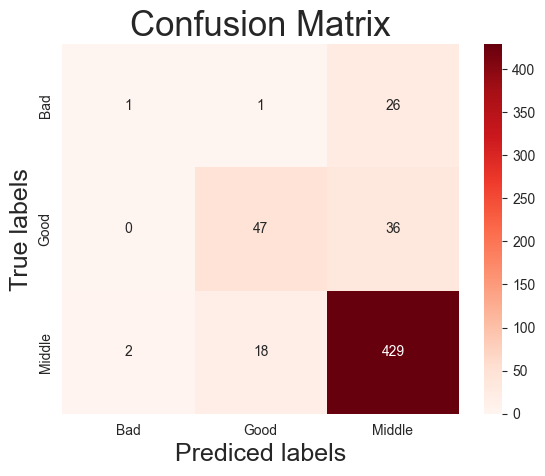

In [25]:
plot_confusion_matrix(y_test, y_pred_rf)

In [26]:
cr = metrics.classification_report(y_test, y_pred_rf)
print(cr)

              precision    recall  f1-score   support

         Bad       0.33      0.04      0.06        28
        Good       0.71      0.57      0.63        83
      Middle       0.87      0.96      0.91       449

    accuracy                           0.85       560
   macro avg       0.64      0.52      0.54       560
weighted avg       0.82      0.85      0.83       560



<a id="lr"></a>
<h2><b><span style="color:#009b2d">🍷 Step 4.3 | </span><span style="color:#9b006e">LogisticRegression</span></b></h2>

In [28]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'class_weight' : ['balanced'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

lr = LogisticRegression()
lr_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10).fit(X_train, y_train)

print('Tuned hyper parameters : ', lr_cv.best_params_)
print('accuracy : ', lr_cv.best_score_)

Tuned hyper parameters :  {'C': 0.1, 'class_weight': 'balanced', 'solver': 'liblinear'}
accuracy :  0.8402725914861836


In [29]:
lr = LogisticRegression(**lr_cv.best_params_).fit(X_train, y_train)

In [30]:
y_pred_lr = lr.predict(X_test)

lr_score = round(lr.score(X_test, y_test), 3)
print('LogisticRegression score : ', lr_score)

LogisticRegression score :  0.804


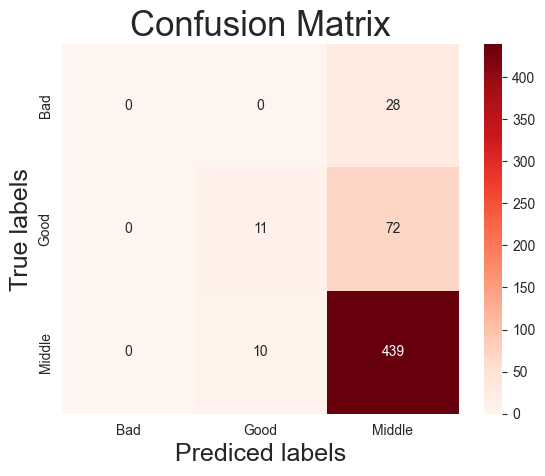

In [31]:
plot_confusion_matrix(y_test, y_pred_lr)

In [32]:
cr = metrics.classification_report(y_test, y_pred_lr)
print(cr)

              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00        28
        Good       0.52      0.13      0.21        83
      Middle       0.81      0.98      0.89       449

    accuracy                           0.80       560
   macro avg       0.45      0.37      0.37       560
weighted avg       0.73      0.80      0.74       560



<a id="svc"></a>
<h2><b><span style="color:#009b2d">🍷 Step 4.4 | </span><span style="color:#9b006e">SVC</span></b></h2>

In [33]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'gamma' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
}



svc = SVC()
svc_cv = GridSearchCV(estimator=svc, param_grid=parameters, cv=10).fit(X_train, y_train)



print('Tuned hyper parameters : ', svc_cv.best_params_)
print('accuracy : ', svc_cv.best_score_)

Tuned hyper parameters :  {'C': 10, 'gamma': 100}
accuracy :  0.8691187453323375


In [34]:
# Model
svc = SVC(**svc_cv.best_params_).fit(X_train, y_train)

In [35]:
y_pred_svc = svc.predict(X_test)

svc_score = round(svc.score(X_test, y_test), 3)
print('SVC Score : ', svc_score)

SVC Score :  0.846


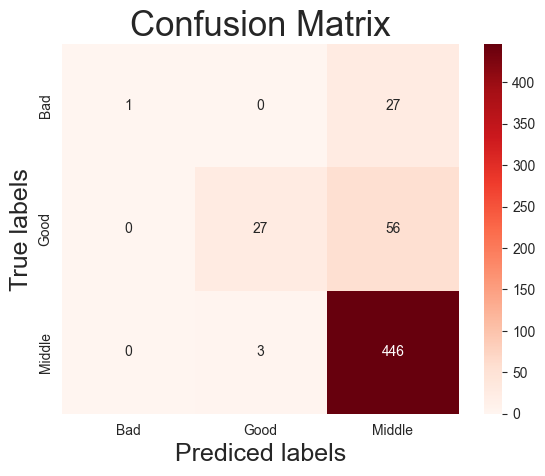

In [36]:
plot_confusion_matrix(y_test, y_pred_svc)

In [37]:
cr = metrics.classification_report(y_test, y_pred_svc)
print(cr)

              precision    recall  f1-score   support

         Bad       1.00      0.04      0.07        28
        Good       0.90      0.33      0.48        83
      Middle       0.84      0.99      0.91       449

    accuracy                           0.85       560
   macro avg       0.91      0.45      0.49       560
weighted avg       0.86      0.85      0.81       560



<a id="tree"></a>
<h2><b><span style="color:#009b2d">🍷 Step 4.5 | </span><span style="color:#9b006e">DecisionTreeClassifier</span></b></h2>

In [38]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : list(np.arange(4, 30, 1))
        }



tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(estimator=tree, cv=10, param_grid=parameters).fit(X_train, y_train)



print('Tuned hyper parameters : ', tree_cv.best_params_)
print('accuracy : ', tree_cv.best_score_)

Tuned hyper parameters :  {'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}
accuracy :  0.8479462285287529


In [39]:
tree = DecisionTreeClassifier(**tree_cv.best_params_).fit(X_train, y_train)

In [40]:
y_pred_tree = tree.predict(X_test)

tree_score = round(tree.score(X_test, y_test), 3)
print('DecisionTreeClassifier Score : ', tree_score)

DecisionTreeClassifier Score :  0.802


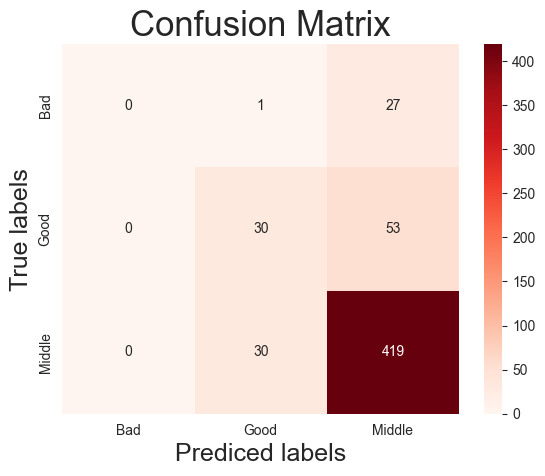

In [41]:
plot_confusion_matrix(y_test, y_pred_tree)

In [42]:
cr = metrics.classification_report(y_test, y_pred_tree)
print(cr)

              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00        28
        Good       0.49      0.36      0.42        83
      Middle       0.84      0.93      0.88       449

    accuracy                           0.80       560
   macro avg       0.44      0.43      0.43       560
weighted avg       0.75      0.80      0.77       560



<a id="knn"></a>
<h2><b><span style="color:#009b2d">🍷 Step 4.6 | </span><span style="color:#9b006e">KNeighborsClassifier</span></b></h2>

In [43]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'n_neighbors' : list(np.arange(3, 20, 2)),
    'p' : [1, 2, 3, 4]
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=knn, cv=10, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters : ', knn_cv.best_params_)
print('accuracy : ', knn_cv.best_score_)

Tuned hyper parameters :  {'n_neighbors': 19, 'p': 1}
accuracy :  0.8392737117251681


In [44]:
knn = KNeighborsClassifier(**knn_cv.best_params_).fit(X_train, y_train)

In [45]:
y_pred_knn = knn_cv.predict(X_test)

knn_score = round(knn.score(X_test, y_test), 3)
print('KNeighborsClassifier Score :', knn_score)

KNeighborsClassifier Score : 0.809


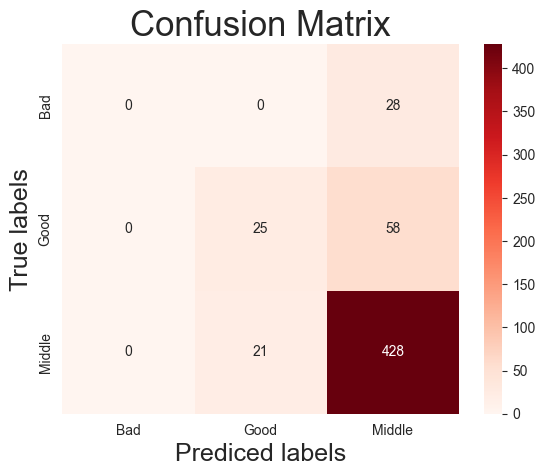

In [46]:
plot_confusion_matrix(y_test, y_pred_knn)

In [47]:
cr = metrics.classification_report(y_test, y_pred_knn)
print(cr)

              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00        28
        Good       0.54      0.30      0.39        83
      Middle       0.83      0.95      0.89       449

    accuracy                           0.81       560
   macro avg       0.46      0.42      0.43       560
weighted avg       0.75      0.81      0.77       560



<a id="result"></a>
<h2><b><span style="color:#009b2d">🍷 Step 4.4 | </span><span style="color:#9b006e">Result</span></b></h2>

In [48]:
from sklearn.naive_bayes import GaussianNB

In [60]:
gnb = GaussianNB().fit(X_train, y_train)
y_pred = gnb.predict(X_test)
gnb_score = round(gnb.score(X_test, y_test), 3)
print('GNB Score :', gnb_score)

GNB Score : 0.777


In [61]:
result = pd.DataFrame({
    'Algorithm' : ['RandomForestClassifier', 'LogisticRegression', 'SVC', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'GaussianNB'],
    'Score' : [rf_score, lr_score, svc_score, tree_score, knn_score, gnb_score]
})

result

,Algorithm,Score
0,RandomForestClassifier,0.852
1,LogisticRegression,0.804
2,SVC,0.846
3,DecisionTreeClassifier,0.802
4,KNeighborsClassifier,0.809
5,GaussianNB,0.777


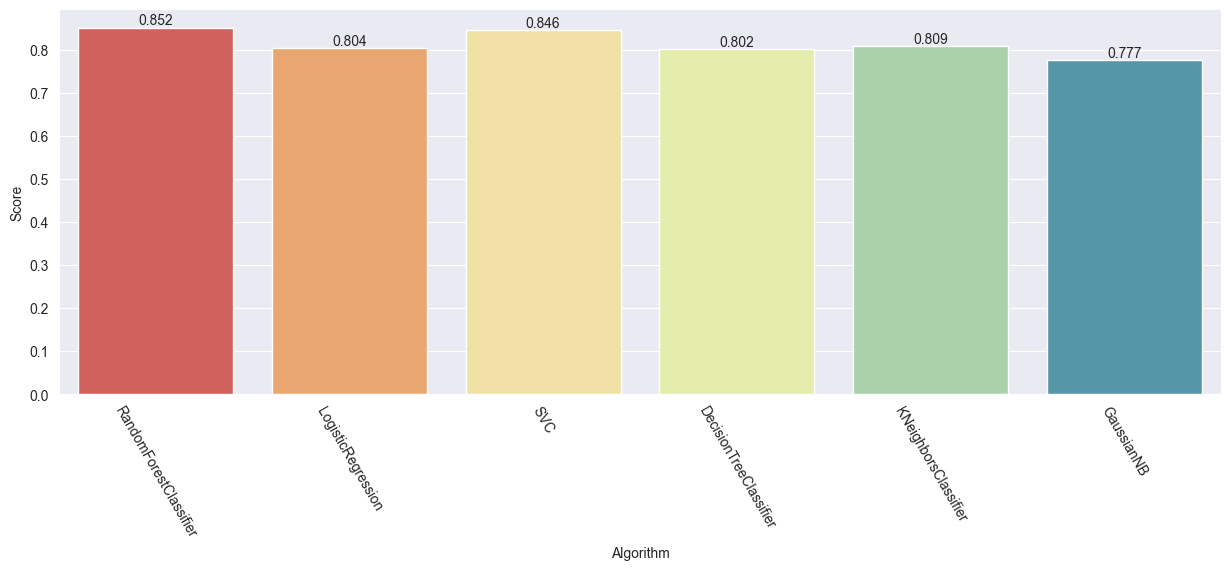

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.barplot(x='Algorithm', y='Score', data=result)
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_xticklabels(labels=result.Algorithm, rotation=300)
plt.show()

<div style="background-image: url(https://i.postimg.cc/T1gYxL48/v870-tang-35.jpg)">
<h3 style="font-size:185%; font-weight:bolder; color:#005f26">Results : </h3>

<span style="font-size:120%; font-weight:700; color:#005f26">Acording to the above plots, best algorithms base on Score are :</span>

<span style="font-size:100%; font-weight:500; color:#005f26">
<ul>RandomForestClassifier</ul>
<ul>SVC</ul>
<ul>DecisionTreeClassifier</ul>
<ul>KNeighborsClassifier</ul>
</br>
</span>

<span style="font-size:120%; font-weight:700; color:#005f26"> And best Algorithm base on runtime, are :</span>

<span style="font-size:100%; font-weight:500; color:#005f26">
<ul>DecisionTreeClassifie</ul>
<ul>KNeighborsClassifier</ul>

</br>
</span>
</br>

<span style="font-size:150%; font-weight:bolder; color:navy">We choose <code> KNeighborsClassifier </code></span>
</div>

<a id="author"></a>    
<div style="border-radius:10px; padding: 15px; font-size:130%; text-align:left; background-image: url(https://i.postimg.cc/T1gYxL48/v870-tang-35.jpg)">

<h4 align="left"><span style="font-weight:700; font-size:150%"><font color=#d10202>Author:</font><font color=navy> Nima Pourmoradi</font></span></h4>
<h6 align="left"><font color=#ff6200><a href='https://github.com/NimaPourmoradi'>github: https://github.com/NimaPourmoradi</font></h6>
<h6 align="left"><font color=#ff6200><a href='https://www.kaggle.com/nimapourmoradi'>kaggle : https://www.kaggle.com/nimapourmoradi</a></font></h6>
<h6 align="left"><font color=#ff6200><a href='https://www.linkedin.com/in/nima-pourmoradi-081949288/'>linkedin : www.linkedin.com/in/nima-pourmoradi</a></font></h6>
<h6 align="left"><font color=#ff6200><a href='https://t.me/Nima_Pourmoradi'>Telegram : https://t.me/Nima_Pourmoradi</a></font></h6>